In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
tracks = pd.read_csv('tracks_records.csv')
tracks.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],2/22/1922,0.645,0.4450,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],6/1/1922,0.695,0.2630,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],3/21/1922,0.434,0.1770,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],3/21/1922,0.321,0.0946,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [ ]:
tracks.shape


(118142, 20)

In [ ]:
tracks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118142 entries, 0 to 118141
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                118142 non-null  object 
 1   name              118142 non-null  object 
 2   popularity        118142 non-null  int64  
 3   duration_ms       118142 non-null  int64  
 4   explicit          118142 non-null  int64  
 5   artists           118142 non-null  object 
 6   id_artists        118142 non-null  object 
 7   release_date      118142 non-null  object 
 8   danceability      118141 non-null  float64
 9   energy            118141 non-null  float64
 10  key               118141 non-null  float64
 11  loudness          118141 non-null  float64
 12  mode              118141 non-null  float64
 13  speechiness       118141 non-null  float64
 14  acousticness      118141 non-null  float64
 15  instrumentalness  118141 non-null  float64
 16  liveness          11

In [ ]:
tracks.isnull().sum()


,0
id,0
name,0
popularity,0
duration_ms,0
explicit,0
artists,0
id_artists,0
release_date,0
danceability,1
energy,1


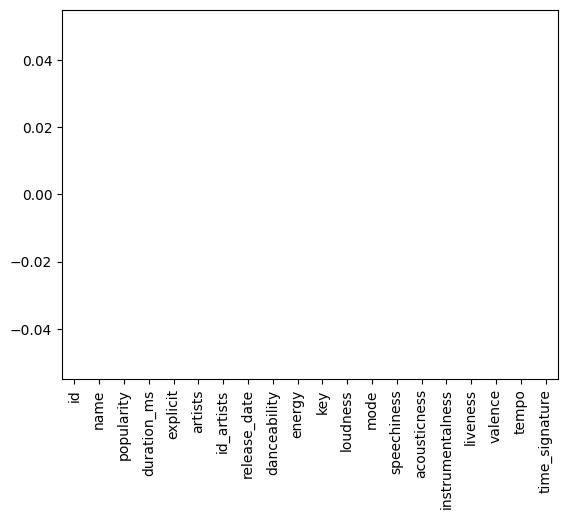

In [ ]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()


In [ ]:
tracks = tracks.drop(['id', 'id_artists'], axis = 1)


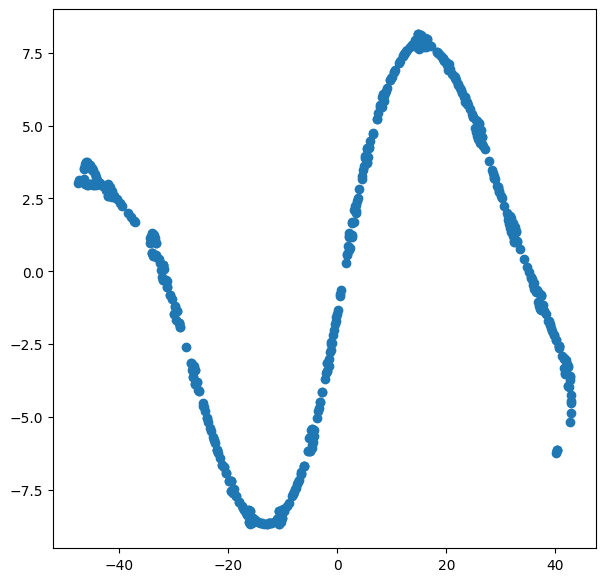

In [ ]:
numeric_tracks = tracks.select_dtypes(include=[float, int]).head(500)

# Initialize TSNE model
model = TSNE(n_components=2, random_state=0)

# Fit and transform the numeric data
tsne_data = model.fit_transform(numeric_tracks)

# Plotting the result
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [ ]:
tracks['name'].nunique(), tracks.shape


(97559, (118141, 18))

In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)


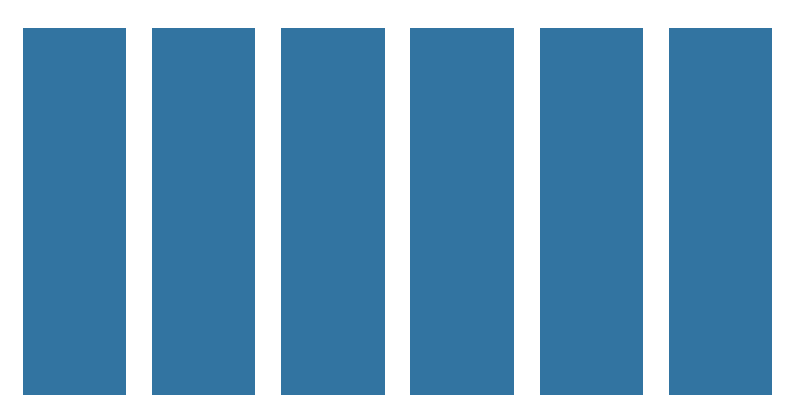

In [ ]:
data = {
    'release_date': ['2/22/1922', '6/1/1922', '3/21/1922', '1922', '1922', '3/29/1922']
}
tracks = pd.DataFrame(data)

# Define a function to handle mixed date formats
def extract_year(date):
    try:
        # Try converting full dates to datetime objects and extract the year
        return pd.to_datetime(date).year
    except:
        # If conversion fails (i.e., it's just a year), return the year as an integer
        return int(date)

# Apply the function to the release_date column
tracks['release_year'] = tracks['release_date'].apply(extract_year)

plt.figure(figsize = (10, 5))
sb.countplot(tracks['release_year'])
plt.axis('off')
plt.show()


In [ ]:
floats = []

for col in tracks.columns:
    if tracks[col].dtype == 'float':
        floats.append(col)
print(len(floats))


0


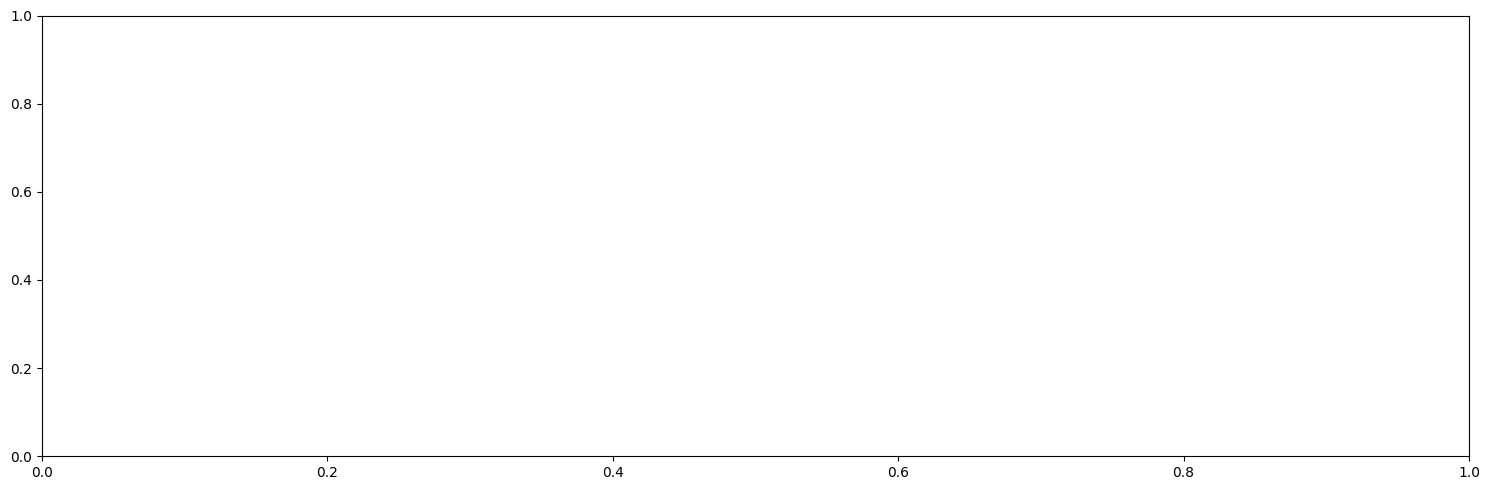

In [ ]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


In [ ]:
tracks.columns = tracks.columns.str.strip()

In [ ]:
print(tracks.head())


  release_date  release_year
0    2/22/1922          1922
1     6/1/1922          1922
2    3/21/1922          1922
3         1922          1922
4         1922          1922


In [ ]:
print(tracks['popularity'].dtype)
print(tracks['popularity'].head())


int64
0    6
1    0
2    0
3    0
4    0
Name: popularity, dtype: int64


In [ ]:
tracks = pd.read_csv('tracks_records.csv')
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],2/22/1922,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],6/1/1922,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],3/21/1922,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],3/21/1922,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_similarities(song_name, data):
    # Ensure the song exists in the DataFrame
    if song_name not in data['name'].values:
        raise ValueError(f"Song '{song_name}' not found in the dataset")

    # Extract the features for the input song
    input_song = data[data['name'] == song_name]
    input_features = input_song[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].values

    # Extract features for all songs in the dataset
    all_features = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].values

    # Standardize features
    scaler = StandardScaler()
    all_features_scaled = scaler.fit_transform(all_features)
    input_features_scaled = scaler.transform(input_features)

    # Calculate Euclidean distances
    distances = euclidean_distances(input_features_scaled, all_features_scaled)

    # Flatten the distances and add them as a column to the DataFrame
    distance_array = distances.flatten()
    data['similarity_factor'] = distance_array

    return data

In [ ]:
def recommend_songs(song_name):
    data = tracks.copy()  # Assuming 'tracks' is your DataFrame

    data = get_similarities(song_name, data)

    recommendations = data[data['name'] != song_name].sort_values(by=['similarity_factor', 'popularity'], ascending=[True, False])
    top_recommendations = recommendations.head(10)

    return top_recommendations

In [ ]:
print(recommend_songs('Love Someone'))

                            id                        name  popularity  \
89106   1Fid2jjqsHViMX6xNH70hE                    Atlantis          75   
158522  0IJoJOVw1hSws1kLH96e7d                  Viernes 13          68   
93752   3TZ7NHkMT82AhwuYsd00Hz              Your eyes tell          76   
88952   75ZvA4QfFiZvzhj2xkaWAh                I Fall Apart          83   
75455   3NLrRZoMF0Lx6zTlYqeIo4            Here Without You          76   
90912   0e7ipj03S05BNilyu5bRzt  rockstar (feat. 21 Savage)          86   
90463   1R0a2iXumgCiFb7HEZ7gUE              Don’t Blame Me          73   
88173   360Wr96ywrCQq4kTAJ8Pq6                  Pacify Her          74   
382209  1zY6ekSJ8VI6tZ6nBqoo7g       I Need You To Hate Me          73   
91371   49QVOdWgGagzLrThkIqtK6              Scared Of Love          74   

        duration_ms  explicit                       artists  \
89106        229173         0                   ['Seafret']   
158522       181067         0           ['Marcos Menchaca']